In [131]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pickle

In [132]:
df = pd.read_csv(r"../../first_exo/concrete_strength_dataset.csv")

In [133]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [134]:
def dataSplitting():
    # split into input (X) and output (y) variables
    X = df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
    y = df["Strength"]
    dataSplitting.X_train, dataSplitting.X_test, dataSplitting.y_train, dataSplitting.y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return dataSplitting.X_train, dataSplitting.X_test, dataSplitting.y_train, dataSplitting.y_test
dataSplitting()

(     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
 900   150.0               237.0      0.0  174.0              12.0   
 370   218.9                 0.0    124.1  158.5              11.3   
 604   339.0                 0.0      0.0  197.0               0.0   
 973   143.8               136.3    106.2  178.1               7.5   
 593   252.5                 0.0      0.0  185.7               0.0   
 ..      ...                 ...      ...    ...               ...   
 87    286.3               200.9      0.0  144.7              11.2   
 330   246.8                 0.0    125.1  143.3              12.0   
 466   190.3                 0.0    125.2  166.6               9.9   
 121   475.0               118.8      0.0  181.1               8.9   
 860   314.0                 0.0    113.0  170.0              10.0   
 
      Coarse Aggregate  Fine Aggregate  Age  
 900            1069.0           675.0   28  
 370            1078.7           794.9   14  
 604             968

In [135]:
print(type(dataSplitting.X_train))

<class 'pandas.core.frame.DataFrame'>


In [136]:
def dataStandardisation():

    scaler = StandardScaler()
    dataStandardisation.scaled = scaler.fit_transform(dataSplitting.X_train)
    dataStandardisation.scaled_test = scaler.transform(dataSplitting.X_test)
    return dataStandardisation.scaled ,dataStandardisation.scaled_test
dataStandardisation()

(array([[-1.24699958,  1.82724983, -0.80064168, ...,  1.20799779,
         -1.19135323, -0.29579403],
        [-0.61372987, -0.86457843,  1.17123888, ...,  1.33138138,
          0.30486673, -0.52327355],
        [ 0.49012633, -0.86457843, -0.80064168, ..., -0.07671794,
          0.13141004,  5.17996308],
        ...,
        [-0.87659655, -0.86457843,  1.18871728, ...,  1.33519737,
          0.35478233,  0.87410067],
        [ 1.74012169,  0.48474308, -0.80064168, ..., -1.55096104,
          0.13764949, -0.29579403],
        [ 0.26034777, -0.86457843,  0.994866  , ..., -0.62367612,
          0.15636784, -0.29579403]]),
 array([[-0.18082707,  0.43022504, -0.80064168, ..., -0.53463641,
         -1.25374772,  5.17996308],
        [ 0.70703729,  1.28206942, -0.80064168, ..., -0.37309295,
         -0.18305821, -0.63701331],
        [ 0.95795547,  1.28206942, -0.80064168, ..., -0.37309295,
         -0.18305821, -0.29579403],
        ...,
        [-0.28192963, -0.86457843, -0.80064168, ..., -

In [137]:
print(type(dataStandardisation.scaled))

<class 'numpy.ndarray'>


In [138]:
def dataModeling():
    # define the keras model
    dataModeling.model = Sequential()
    dataModeling.model.add(Dense(12, input_dim=8, activation='relu'))
    dataModeling.model.add(Dense(8, activation='relu'))
    dataModeling.model.add(Dense(6, activation='relu'))
    dataModeling.model.add(Dense(1))
    dataModeling.model.compile(loss='mse', optimizer='rmsprop', metrics=['mean_absolute_error'])
    return dataModeling.model
dataModeling()

In [139]:
dataModeling.model.__module__

'keras.engine.sequential'

In [140]:
from tensorflow import keras

keras.Sequential.__module__

'keras.engine.sequential'

In [141]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [142]:
print(df[0:6:])

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  


In [143]:
def modelEarlyStopping():
        modelEarlyStopping.stp = EarlyStopping(
                monitor="val_loss",
                min_delta=0,
                patience=0,
                verbose=1,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
        )
        return modelEarlyStopping.stp

In [144]:
def modelFitting():
    modelFitting.history = dataModeling.model.fit(dataSplitting.X_train, dataSplitting.y_train,validation_split=0.30,epochs=400, batch_size=32)
    # ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')
    return modelFitting.history

In [145]:
modelFitting()

Epoch 1/400
16/16 [==============================] - 1s 11ms/step - loss: 120049.5547 - mean_absolute_error: 333.6896 - val_loss: 63205.1406 - val_mean_absolute_error: 246.6412
Epoch 2/400
16/16 [==============================] - 0s 7ms/step - loss: 46291.8398 - mean_absolute_error: 210.0784 - val_loss: 30994.9883 - val_mean_absolute_error: 172.8210
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 24346.7090 - mean_absolute_error: 152.3007 - val_loss: 17539.9922 - val_mean_absolute_error: 129.6624
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 13811.6191 - mean_absolute_error: 114.1754 - val_loss: 9877.5615 - val_mean_absolute_error: 96.4062
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 7555.7925 - mean_absolute_error: 83.3803 - val_loss: 5175.4463 - val_mean_absolute_error: 68.8048
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 3917.4817 - mean_absolute_error: 58.4596 - val_loss: 260

In [146]:
print(modelFitting.history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


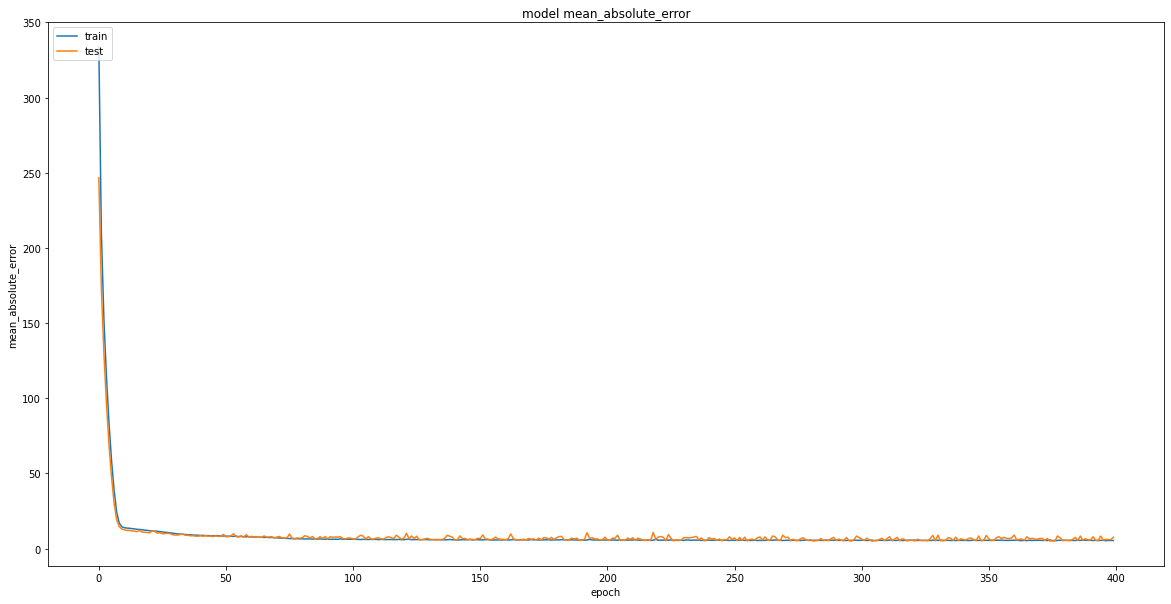

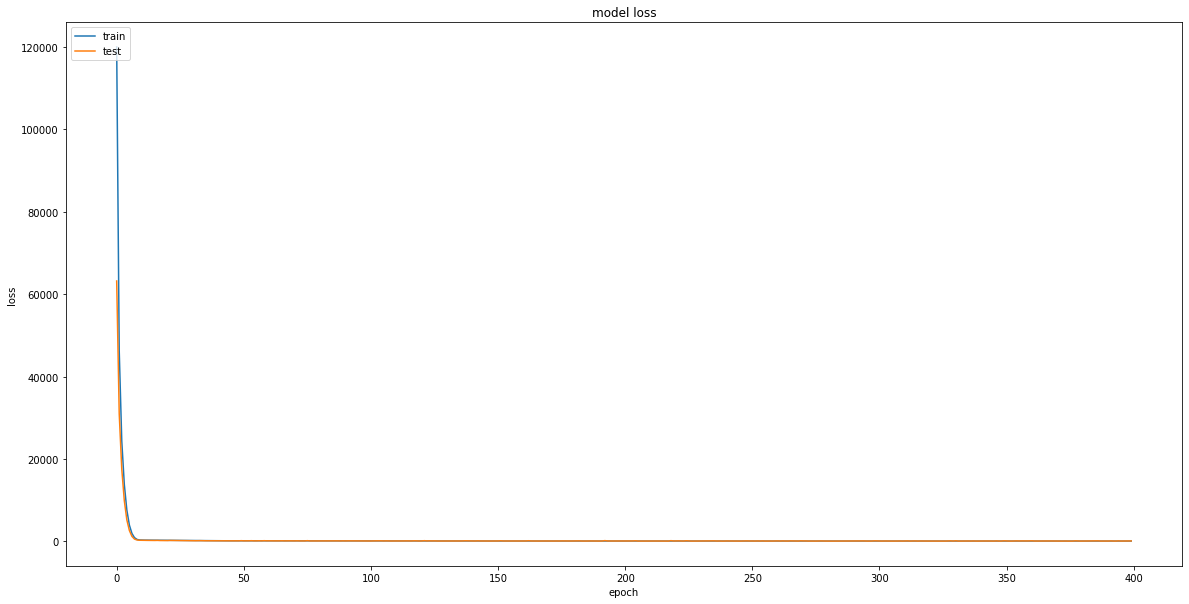

In [147]:
def modelLearningCurves():
    # list all data in history
    history = modelLearningCurves.history = modelFitting.history
    print(history.history.keys())
    plt.figure(figsize=(20,10))
    # summarize history for accuracy
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model mean_absolute_error')
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    return plt.show()

modelLearningCurves()


In [152]:

def computeR2Score():
    y_pred = dataModeling.model.predict(dataSplitting.X_test)
    r2_score_value = r2_score(dataSplitting.y_test,y_pred)
    print(type(r2_score(dataSplitting.y_test,y_pred)))

    return r2_score_value

In [149]:

def modelDumpedInPickle():
    return pickle.dump(computeR2Score(), open(r'compute_r2_score.pkl', 'wb'))

In [153]:
computeR2Score()

<class 'numpy.float64'>


0.7428071174331801

In [ ]:
df = pd.read_csv(r"../../first_exo/concrete_strength_dataset.csv")

In [ ]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
def dataSplitting():
    # split into input (X) and output (y) variables
    X = df[['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
    y = df["Strength"]
    dataSplitting.X_train, dataSplitting.X_test, dataSplitting.y_train, dataSplitting.y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return dataSplitting.X_train, dataSplitting.X_test, dataSplitting.y_train, dataSplitting.y_test
dataSplitting()

(     Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
 900   150.0               237.0      0.0  174.0              12.0   
 370   218.9                 0.0    124.1  158.5              11.3   
 604   339.0                 0.0      0.0  197.0               0.0   
 973   143.8               136.3    106.2  178.1               7.5   
 593   252.5                 0.0      0.0  185.7               0.0   
 ..      ...                 ...      ...    ...               ...   
 87    286.3               200.9      0.0  144.7              11.2   
 330   246.8                 0.0    125.1  143.3              12.0   
 466   190.3                 0.0    125.2  166.6               9.9   
 121   475.0               118.8      0.0  181.1               8.9   
 860   314.0                 0.0    113.0  170.0              10.0   
 
      Coarse Aggregate  Fine Aggregate  Age  
 900            1069.0           675.0   28  
 370            1078.7           794.9   14  
 604             968

In [ ]:
print(type(dataSplitting.X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
def dataStandardisation():

    scaler = StandardScaler()
    dataStandardisation.scaled = scaler.fit_transform(dataSplitting.X_train)
    dataStandardisation.scaled_test = scaler.transform(dataSplitting.X_test)
    return dataStandardisation.scaled ,dataStandardisation.scaled_test
dataStandardisation()

(array([[-1.24699958,  1.82724983, -0.80064168, ...,  1.20799779,
         -1.19135323, -0.29579403],
        [-0.61372987, -0.86457843,  1.17123888, ...,  1.33138138,
          0.30486673, -0.52327355],
        [ 0.49012633, -0.86457843, -0.80064168, ..., -0.07671794,
          0.13141004,  5.17996308],
        ...,
        [-0.87659655, -0.86457843,  1.18871728, ...,  1.33519737,
          0.35478233,  0.87410067],
        [ 1.74012169,  0.48474308, -0.80064168, ..., -1.55096104,
          0.13764949, -0.29579403],
        [ 0.26034777, -0.86457843,  0.994866  , ..., -0.62367612,
          0.15636784, -0.29579403]]),
 array([[-0.18082707,  0.43022504, -0.80064168, ..., -0.53463641,
         -1.25374772,  5.17996308],
        [ 0.70703729,  1.28206942, -0.80064168, ..., -0.37309295,
         -0.18305821, -0.63701331],
        [ 0.95795547,  1.28206942, -0.80064168, ..., -0.37309295,
         -0.18305821, -0.29579403],
        ...,
        [-0.28192963, -0.86457843, -0.80064168, ..., -

In [ ]:
print(type(dataStandardisation.scaled))

<class 'numpy.ndarray'>


In [ ]:
def dataModeling():
    # define the keras model
    dataModeling.model = Sequential()
    dataModeling.model.add(Dense(12, input_dim=8, activation='relu'))
    dataModeling.model.add(Dense(8, activation='relu'))
    dataModeling.model.add(Dense(6, activation='relu'))
    dataModeling.model.add(Dense(1))
    dataModeling.model.compile(loss='mse', optimizer='rmsprop', metrics=['mean_absolute_error'])
    return dataModeling.model
dataModeling()

In [ ]:
dataModeling.model.__module__

'keras.engine.sequential'

In [ ]:
from tensorflow import keras

keras.Sequential.__module__

'keras.engine.sequential'

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
print(df[0:6:])

   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   
5   266.0               114.0      0.0  228.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30  
5             932.0           670.0   90     47.03  


In [ ]:
def modelEarlyStopping():
        modelEarlyStopping.stp = EarlyStopping(
                monitor="val_loss",
                min_delta=0,
                patience=0,
                verbose=1,
                mode="auto",
                baseline=None,
                restore_best_weights=False,
        )
        return modelEarlyStopping.stp

In [ ]:
def modelFitting():
    modelFitting.history = dataModeling.model.fit(dataSplitting.X_train, dataSplitting.y_train,validation_split=0.30,epochs=400, batch_size=32)
    # ,validation_split=0.33,callbacks=EarlyStopping(monitor='val_loss')
    return modelFitting.history

In [ ]:
modelFitting()

Epoch 1/400
16/16 [==============================] - 1s 11ms/step - loss: 120049.5547 - mean_absolute_error: 333.6896 - val_loss: 63205.1406 - val_mean_absolute_error: 246.6412
Epoch 2/400
16/16 [==============================] - 0s 7ms/step - loss: 46291.8398 - mean_absolute_error: 210.0784 - val_loss: 30994.9883 - val_mean_absolute_error: 172.8210
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 24346.7090 - mean_absolute_error: 152.3007 - val_loss: 17539.9922 - val_mean_absolute_error: 129.6624
Epoch 4/400
16/16 [==============================] - 0s 3ms/step - loss: 13811.6191 - mean_absolute_error: 114.1754 - val_loss: 9877.5615 - val_mean_absolute_error: 96.4062
Epoch 5/400
16/16 [==============================] - 0s 3ms/step - loss: 7555.7925 - mean_absolute_error: 83.3803 - val_loss: 5175.4463 - val_mean_absolute_error: 68.8048
Epoch 6/400
16/16 [==============================] - 0s 3ms/step - loss: 3917.4817 - mean_absolute_error: 58.4596 - val_loss: 260

In [ ]:
print(modelFitting.history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


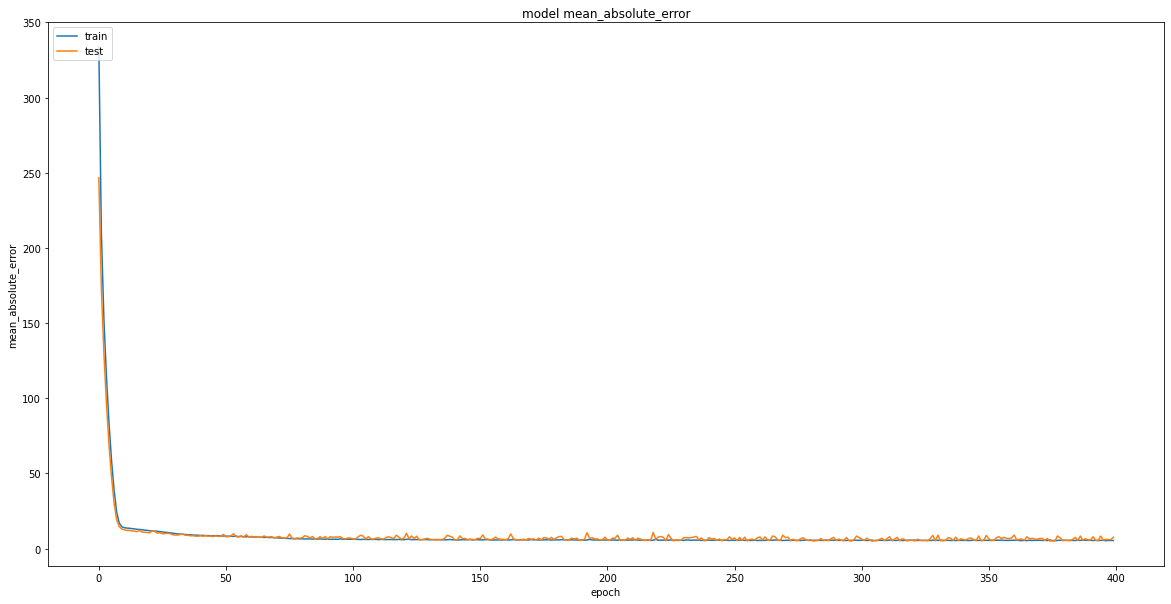

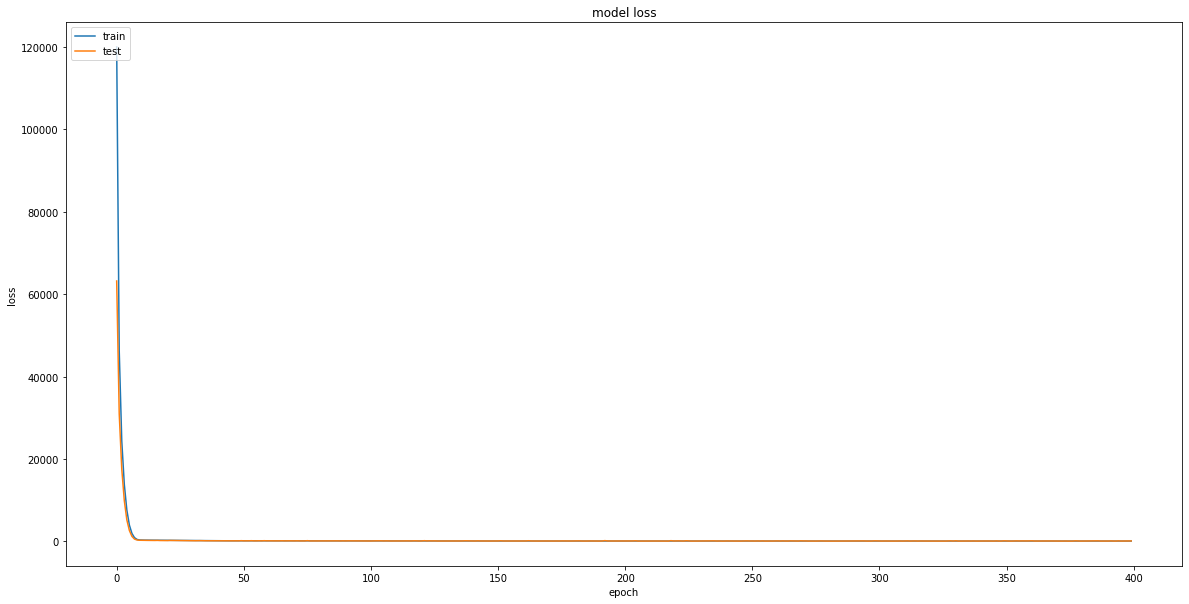

In [ ]:
def modelLearningCurves():
    # list all data in history
    history = modelLearningCurves.history = modelFitting.history
    print(history.history.keys())
    plt.figure(figsize=(20,10))
    # summarize history for accuracy
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model mean_absolute_error')
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    return plt.show()

modelLearningCurves()


In [ ]:

def computeR2Score():
    y_pred = dataModeling.model.predict(dataSplitting.X_test)
    r2_score_value = r2_score(dataSplitting.y_test,y_pred)
    print(type(r2_score(dataSplitting.y_test,y_pred)))

    return r2_score_value

In [ ]:

def modelDumpedInPickle():
    return pickle.dump(computeR2Score(), open(r'compute_r2_score.pkl', 'wb'))

In [ ]:
computeR2Score()

<class 'numpy.float64'>


0.7428071174331801